<a href="https://colab.research.google.com/github/kevinCSdev/Trabajo_5_inteligencia_artificial/blob/main/620454_Evaluacion_5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 5 - Deeplearning

**Autor(es):Diego Pardo - Kevin Cárdenas - Magdiel Fernández**
---

## Descripción


Este notebook contiene el desarrollo de la evaluación 5 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

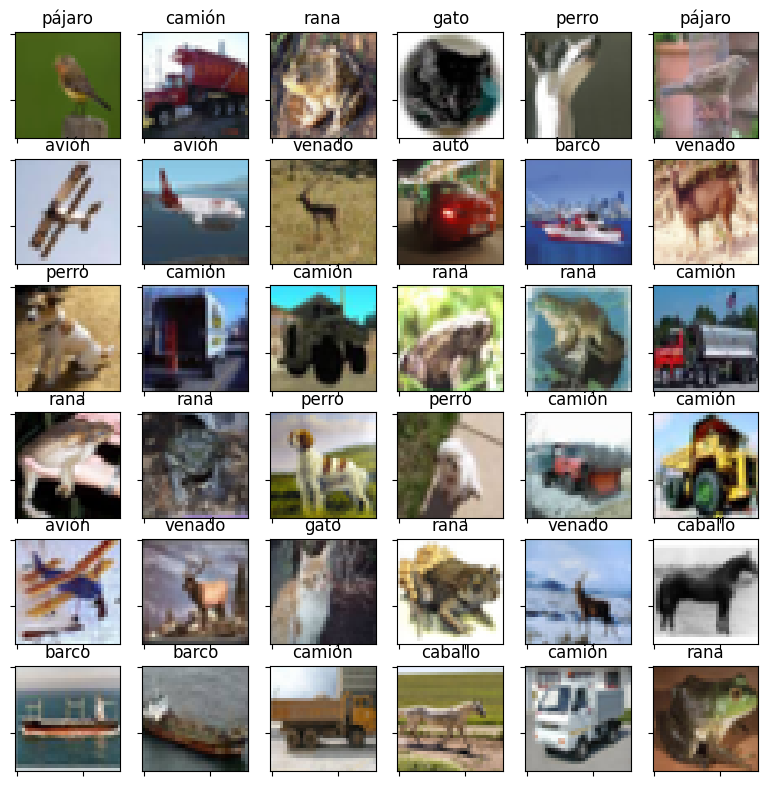

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Se inicia el contador del tiempo
start_time = time()

# Entrena la red
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

# Finaliza el contador del tiempo
end_time = time()
tiempo_entrenamiento_modelo_prueba = end_time - start_time
print(f"\nTiempo de entrenamiento: {tiempo_entrenamiento_modelo_prueba:.2f} segundos ({tiempo_entrenamiento_modelo_prueba / 60:.2f} minutos)")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.2354 - loss: 2.1150 - val_accuracy: 0.3223 - val_loss: 1.8781
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.3508 - loss: 1.8390 - val_accuracy: 0.3582 - val_loss: 1.7894
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.3804 - loss: 1.7561 - val_accuracy: 0.3820 - val_loss: 1.7319
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3998 - loss: 1.7013 - val_accuracy: 0.4008 - val_loss: 1.6941
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4162 - loss: 1.6585 - val_accuracy: 0.4121 - val_loss: 1.6625

Tiempo de entrenamiento: 78.49 segundos (1.31 minutos)


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

In [13]:
# Crea la red feed-forward (tiene 4 capas escondidas!)

k1 = 1024
k2 = 512
k3 = 256
k4 = 128

red1 = keras.Sequential(name="Red_Evaluacion_Optima")
red1.add(keras.layers.Input(shape=(N,), name='entrada'))
red1.add(keras.layers.Dense(k1, activation='relu', name="Primera_capa"))
red1.add(keras.layers.Dense(k2, activation='relu', name="Segunda_capa"))
red1.add(keras.layers.Dense(k3, activation='relu', name="Tercera_capa"))
red1.add(keras.layers.Dense(k4, activation='relu', name="Cuarta_capa")) # Nueva capa
red1.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red1.summary()

red1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)



Model: "Red_Evaluacion_Optima"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cuarta_capa (Dense)             │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Se inicia el contador del tiempo
start_time = time()


# Entrena la red con más épocas y un batch_size más pequeño
num_epocas = 70
x_batch_size = 64
history1 = red1.fit(X_train, Y_train,
                  epochs=num_epocas,
                  batch_size=x_batch_size,
                  validation_data=(X_test, Y_test))

# Finaliza el contador del tiempo
end_time = time()
tiempo_entrenamiento_experimento_1 = end_time - start_time
print(f"\nTiempo de entrenamiento: {tiempo_entrenamiento_experimento_1:.2f} segundos ({tiempo_entrenamiento_experimento_1 / 60:.2f} minutos)")

Epoch 1/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.2661 - loss: 2.0359 - val_accuracy: 0.3576 - val_loss: 1.7882
Epoch 2/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.3789 - loss: 1.7520 - val_accuracy: 0.4056 - val_loss: 1.6845
Epoch 3/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.4162 - loss: 1.6507 - val_accuracy: 0.4261 - val_loss: 1.6274
Epoch 4/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.4390 - loss: 1.5838 - val_accuracy: 0.4411 - val_loss: 1.5767
Epoch 5/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.4583 - loss: 1.5314 - val_accuracy: 0.4584 - val_loss: 1.5360
Epoch 6/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.4760 - loss: 1.4851 - val_accuracy: 0.4654 - val_loss: 1.5072
Epoch 7/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.4877 - loss: 1.4469 - val_accuracy: 0.4733 - val_loss: 1.4802
Epoch 8/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.5021 - loss: 1.4111 - 

#### Experimento 2 - 1 punto

In [ ]:
# Crea la red feed-forward (tiene 4 capas escondidas!)

j1 = 512
j2 = 256
j3 = 128
j4 = 64


red2 = keras.Sequential(name="Red_Evaluacion_Optima")
red2.add(keras.layers.Input(shape=(N,), name='entrada'))
red2.add(keras.layers.Dense(j1, activation='relu', name="Primera_capa"))
red2.add(keras.layers.Dense(j2, activation='relu', name="Segunda_capa"))
red2.add(keras.layers.Dense(j3, activation='relu', name="Tercera_capa"))
red2.add(keras.layers.Dense(j4, activation='relu', name="Cuarta_capa"))
red2.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red2.summary()

red2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion_Optima"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cuarta_capa (Dense)             │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Se inicia el contador del tiempo
start_time = time()


# Entrena la red con más épocas y el batch_size del modelo de prueba
num_epocas = 60
x_batch_size = 128
history2 = red2.fit(X_train, Y_train,
                  epochs=num_epocas,
                  batch_size=x_batch_size,
                  validation_data=(X_test, Y_test))

# Finaliza el contador del tiempo
end_time = time()
tiempo_entrenamiento_experimento_2 = end_time - start_time
print(f"\nTiempo de entrenamiento: {tiempo_entrenamiento_experimento_2:.2f} segundos ({tiempo_entrenamiento_experimento_2 / 60:.2f} minutos)")

Epoch 1/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2320 - loss: 2.1503 - val_accuracy: 0.3011 - val_loss: 1.9132
Epoch 2/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3390 - loss: 1.8616 - val_accuracy: 0.3500 - val_loss: 1.7964
Epoch 3/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3744 - loss: 1.7651 - val_accuracy: 0.3813 - val_loss: 1.7180
Epoch 4/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3999 - loss: 1.7022 - val_accuracy: 0.4022 - val_loss: 1.6673
Epoch 5/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4147 - loss: 1.6544 - val_accuracy: 0.4121 - val_loss: 1.6365
Epoch 6/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4286 - loss: 1.6153 - val_accuracy: 0.4203 - val_loss: 1.6104
Epoch 7/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4393 - loss: 1.5817 - val_accuracy: 0.4306 - val_loss: 1.5882
Epoch 8/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4497 - loss: 1.5519 - val_a

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto



Este es un modelo de red neuronal feedforward para el procesamiento de imágenes. Las capas del modelo son las siguientes:

1. Capa de entrada: Un vector plano de 32×32×3=3072 características, que corresponden a cada imagen del conjunto de datos.

2. Capa oculta 1: Contiene 1024 neuronas y utiliza la función de activación ReLU.

3. Capa oculta 2: Contiene 512 neuronas y utiliza la función de activación ReLU.

4. Capa oculta 3: Contiene 256 neuronas y utiliza la función de activación ReLU.

5. Capa oculta 4: Contiene 128 neuronas y utiliza la función de activación ReLU.

6. Capa de salida: La activación es softmax y entrega las probabilidades de pertenencia a cada categoría.

Finalmente el modelo se compiló utilizando la función de pérdida categorical cross-entropy y el optimizador SGD. La métrica principal de evaluación es el accuracy.


#### Red experimento 2 - 1 punto

Este es un modelo de red neuronal feedforward para el procesamiento de imágenes. Las capas del modelo son las siguientes:

1. Capa de entrada: Un vector plano de 32×32×3=3072 características, que corresponden a cada imagen del conjunto de datos.

2. Capa oculta 1: Contiene 512 neuronas y utiliza la función de activación ReLU.

3. Capa oculta 2: Contiene 256 neuronas y utiliza la función de activación ReLU.

4. Capa oculta 3: Contiene 128 neuronas y utiliza la función de activación ReLU.

5. Capa oculta 4: Contiene 64 neuronas y utiliza la función de activación ReLU.

6. Capa de salida: La activación es softmax y entrega las probabilidades de pertenencia a cada categoría.

Finalmente el modelo se compiló utilizando la función de pérdida categorical cross-entropy y el optimizador SGD. La métrica principal de evaluación es el accuracy.



## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos



In [ ]:
# Tiempo de ejecución del modelo de prueba
print(f"Tiempo del modelo de prueba")
print(f"Tiempo total: {tiempo_entrenamiento_modelo_prueba:.2f} segundos ({tiempo_entrenamiento_modelo_prueba / 60:.2f} minutos)")

# Tiempo de ejecución del modelo experimental 1
print(f"Tiempo del modelo experimental 1")
print(f"Tiempo total: {tiempo_entrenamiento_experimento_1:.2f} segundos ({tiempo_entrenamiento_experimento_1 / 60:.2f} minutos)")

# Tiempo de ejecución del modelo experimental 2
print(f"Tiempo del modelo experimental 2")
print(f"Tiempo total: {tiempo_entrenamiento_experimento_2:.2f} segundos ({tiempo_entrenamiento_experimento_2 / 60:.2f} minutos)")

Tiempo del modelo de prueba
Tiempo total: 98.09 segundos (1.63 minutos)
Tiempo del modelo experimental 1
Tiempo total: 1194.30 segundos (19.91 minutos)
Tiempo del modelo experimental 2
Tiempo total: 526.82 segundos (8.78 minutos)


### Mostrar curvas de entrenamiento/validación - 0,1 puntos


Curvas del modelo de prueba

Curvas del modelo de prueba


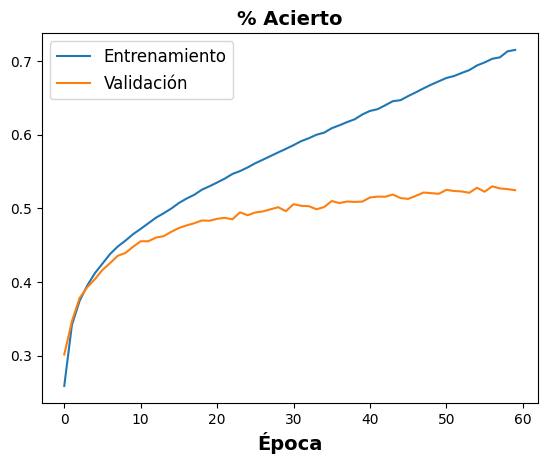

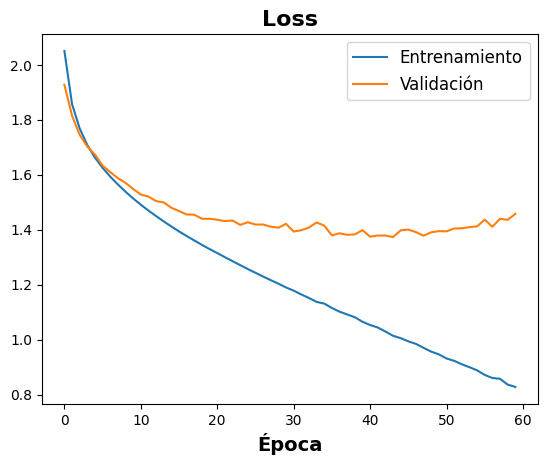

In [ ]:
print(f"Curvas del modelo de prueba")
# Gráfica para el % de acierto
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()



Curvas del modelo experimental 1

Curvas del modelo experimental 1


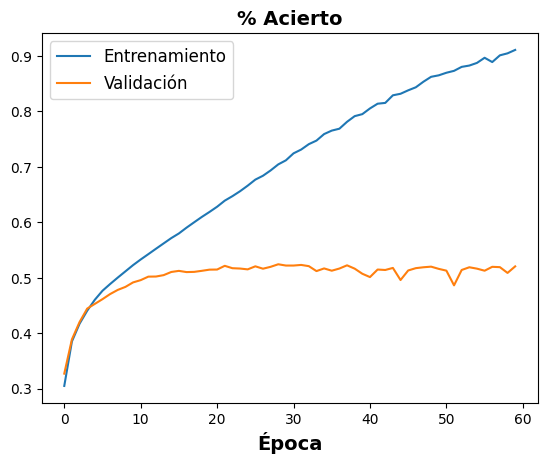

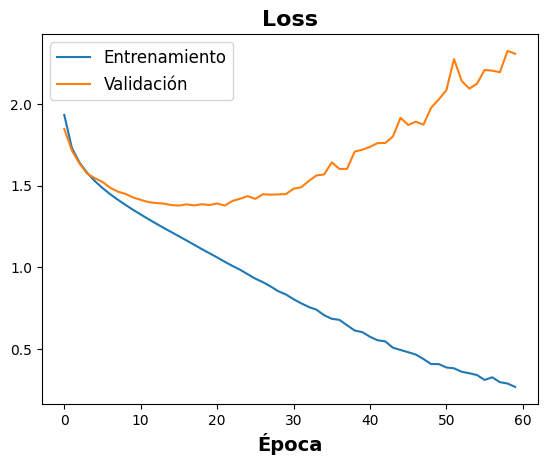

In [ ]:
print(f"Curvas del modelo experimental 1")
# Gráfica para el % de acierto
plt.plot(history1.history['accuracy'], label='Entrenamiento')
plt.plot(history1.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history1.history['loss'], label='Entrenamiento')
plt.plot(history1.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

Curvas del modelo experimental 2

Curvas del modelo experimental 2


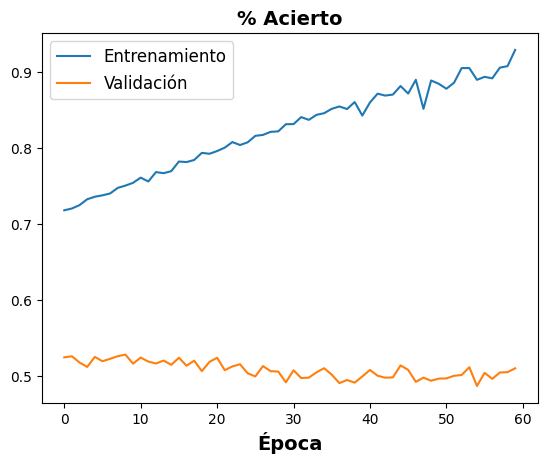

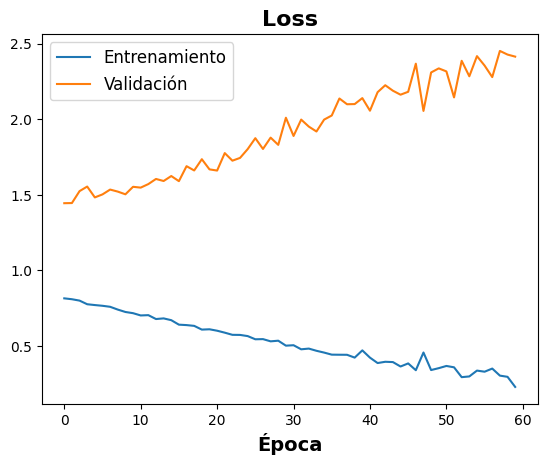

In [ ]:
print(f"Curvas del modelo experimental 2")
# Gráfica para el % de acierto
plt.plot(history2.history['accuracy'], label='Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history2.history['loss'], label='Entrenamiento')
plt.plot(history2.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()



---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

Sí, existe sobreajuste en el modelo. Esto se evidencia al observar que, a medida que avanzan las épocas, la precisión en los datos de entrenamiento mejora constantemente hasta superar el 90 %, mientras que la precisión en los datos de validación se estanca alrededor del 52 % y no presenta una mejora significativa a partir de la época 20. Además, la pérdida de validación comienza a aumentar progresivamente desde ese punto, lo que indica que el modelo está memorizando los datos de entrenamiento en lugar de generalizar. Este comportamiento es característico del sobreajuste, ya que el modelo pierde capacidad de rendimiento en datos no vistos, a pesar de seguir optimizando su desempeño en el conjunto de entrenamiento.

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

Este tipo de arquitectura resulta funcional, no obstante presenta dificultades para la identificación de imágenes, ya que desconoce la proximidad espacial entre píxeles. Al descomponer la imagen en valores individuales y suministrar dicha información de forma lineal al modelo, la red pierde el ordenamiento original de los elementos: dos píxeles contiguos en la imagen quedan desvinculados internamente, repercutiendo en la omisión de información relevante. Asimismo, su entrenamiento resulta considerablemente más lento que el de otras arquitecturas, dado que requiere gestionar un volumen masivo de parámetros al procesar imágenes de alta resolución, lo cual reduce notablemente su eficiencia en comparación con modelos diseñados específicamente para explotar la estructura espacial de los datos.

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

1.-Necesidad de mantener activa la sesión en Colab:
Una de las principales limitaciones encontradas fue que, al utilizar Google Colab, se requería mantener la pestaña activa durante todo el tiempo de ejecución. Esto impuso restricciones en cuanto a la movilidad del usuario y aumentó el riesgo de interrupciones accidentales por cierre de sesión o inactividad.

2.-Largos tiempos de entrenamiento por época:
El modelo, al contar con una arquitectura densa y múltiples épocas de entrenamiento, presentó tiempos prolongados de ejecución. Esto dificultó la experimentación con diferentes configuraciones y aumentó considerablemente el tiempo total requerido para obtener resultados.

3.-Limitado control sobre el entorno de hardware:
Otra limitación fue la imposibilidad de seleccionar o personalizar el entorno de cómputo en Colab, como tipo de GPU o cantidad de memoria disponible. Esto restringió el rendimiento potencial del modelo, especialmente al trabajar con redes profundas o conjuntos de datos más pesados.

---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Incumplimiento de rendimiento exigido - 50% de la calificación final

---